# Congressional Record and Hansard Descriptive Analysis


## Setup


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

if not os.path.exists(DIST_PATH):
    os.makedirs(DIST_PATH)

plt.style.use('ggplot')
load_dotenv()

True

## Time series trends


In [4]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Number of climate change speeches by month


**Climate Congressional Record**


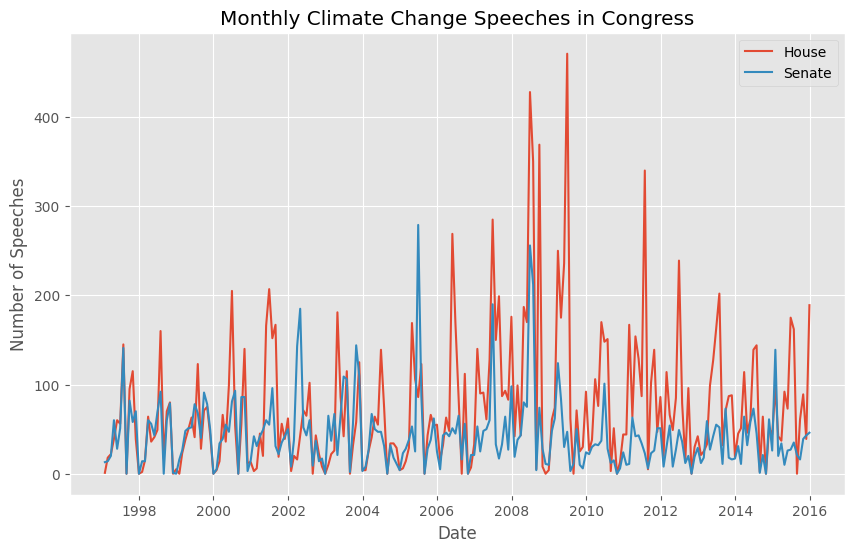

In [14]:
climate_congressional_record['date'] = pd.to_datetime(
    climate_congressional_record['date'])

house_speeches = climate_congressional_record[climate_congressional_record['chamber'] == 'H']
senate_speeches = climate_congressional_record[climate_congressional_record['chamber'] == 'S']

monthly_house_speeches = house_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()
monthly_senate_speeches = senate_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_house_speeches, label='House')
plt.plot(monthly_senate_speeches, label='Senate')

plt.title('Monthly Climate Change Speeches in Congress')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')

plt.legend()
plt.show()

**Climate Hansard**


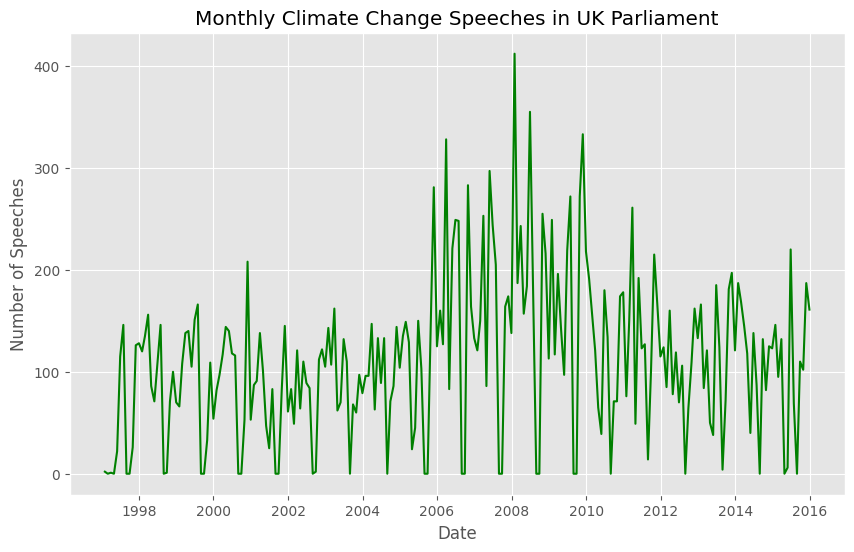

In [19]:
climate_hansard['speech_date'] = pd.to_datetime(climate_hansard['speech_date'])

monthly_hansard_speeches = climate_hansard.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_hansard_speeches, color='green')

plt.title('Monthly Climate Change Speeches in UK Parliament')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')

plt.show()

## Static analysis


In [2]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Number of climate change speeches by political party


**Climate Congressional Record**


/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_18306/1976524859.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Number of Speeches',


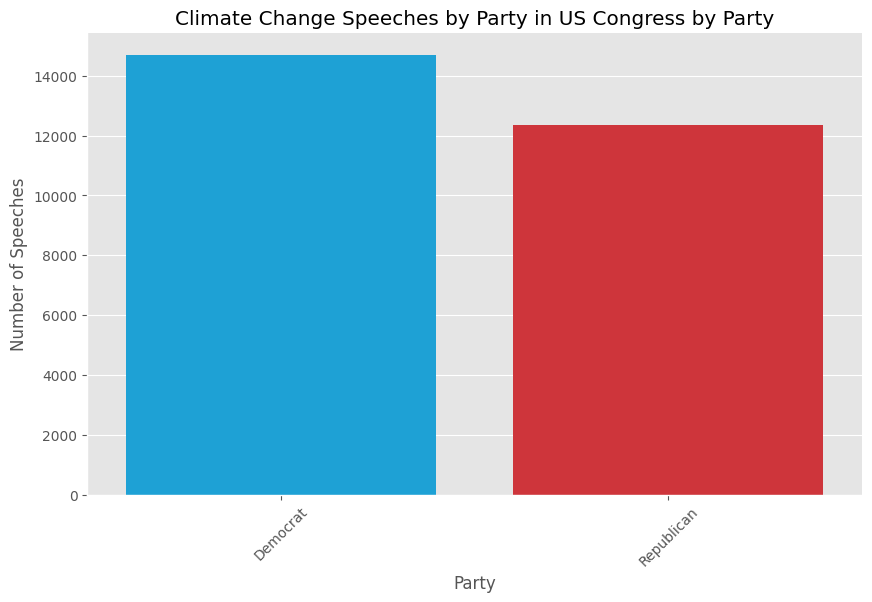

In [3]:
climate_congressional_record['party'] = climate_congressional_record['party'].replace(
    {'D': 'Democrat', 'R': 'Republican'})

congressional_record_party_speeches = climate_congressional_record['party'].value_counts(
).reset_index()
congressional_record_party_speeches.columns = ['Party', 'Number of Speeches']

color_dict = {'Democrat': os.getenv(
    'DEMOCRAT_BLUE'), 'Republican': os.getenv('REPUBLICAN_RED')}

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Number of Speeches',
            data=congressional_record_party_speeches, palette=color_dict)
plt.title('Climate Change Speeches by Party in US Congress by Party')
plt.xlabel('Party')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
sns.despine()
plt.show()

**Climate Hansard**


/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_18306/3293867977.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Number of Speeches',


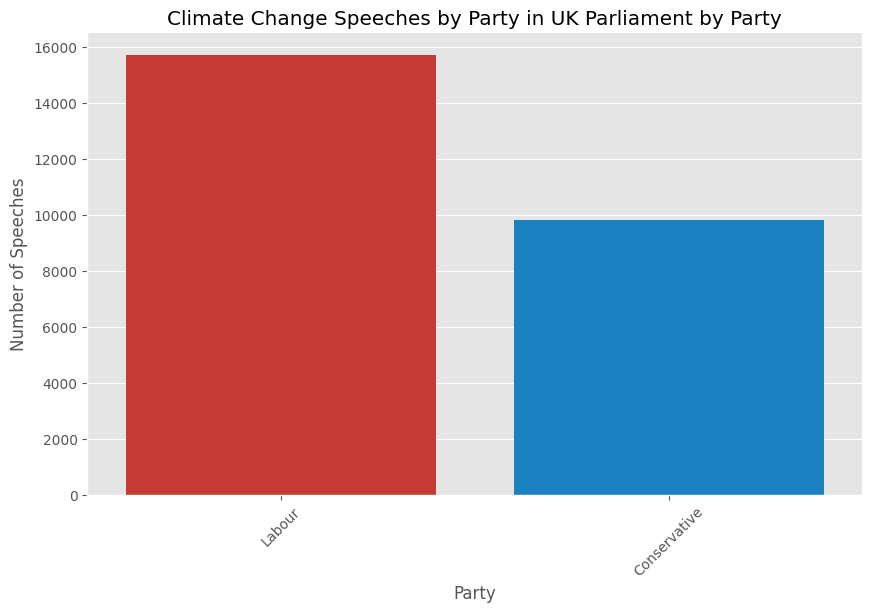

In [7]:
hansard_party_speeches = climate_hansard['speech_party'].value_counts(
).reset_index()
hansard_party_speeches.columns = ['Party', 'Number of Speeches']

color_dict = {'Conservative': os.getenv(
    'CONSERVAITVE_BLUE'), 'Labour': os.getenv('LABOUR_RED')}

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Number of Speeches',
            data=hansard_party_speeches, palette=color_dict)
plt.title('Climate Change Speeches by Party in UK Parliament by Party')
plt.xlabel('Party')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
sns.despine()
plt.show()